# Visualizing Errors

En cualquier medición científica, la contabilización precisa de los errores es casi tan importante, si no más, que la notificación precisa del número en sí.
Por ejemplo, imaginemos que estoy utilizando algunas observaciones astrofísicas para estimar la constante de Hubble, la medición local de la tasa de expansión del universo.
Sé que la literatura actual sugiere un valor de alrededor de 71 (km/s)/Mpc, y mido un valor de 74 (km/s)/Mpc con mi método. ¿Son consistentes los valores? La única respuesta correcta, dada esta información, es la siguiente: no hay forma de saberlo.

Supongamos que amplío esta información con las incertidumbres informadas: la literatura actual sugiere un valor de alrededor de 71 $\pm$ 2,5 (km/s)/Mpc, y mi método ha medido un valor de 74 $\pm$ 5 (km/s)/Mpc. Ahora bien, ¿son consistentes los valores? Esa es una pregunta que se puede responder cuantitativamente.

En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que un gráfico transmita información mucho más completa.

## Basic Errorbars

Se puede crear una barra de error básica con una sola llamada a la función Matplotlib:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import numpy as np

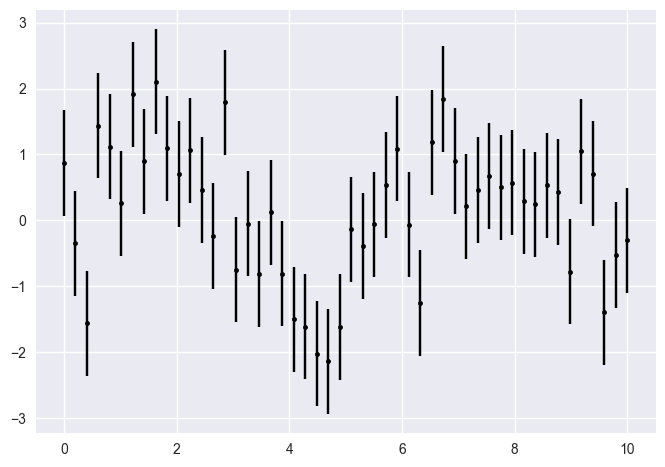

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Aquí, ``fmt`` es un código de formato que controla la apariencia de las líneas y los puntos, y tiene la misma sintaxis que la abreviatura utilizada en ``plt.plot``, descrita en [Gráficos de líneas simples](01-Graficos-de-lineas-simples.ipynb) y [Gráficos de dispersión simples](02-Simple-Scatter-Plots.ipynb).

Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar los resultados.
Con estas opciones adicionales, puede personalizar fácilmente la estética de su gráfico de barras de error.
A menudo me resulta útil, especialmente en gráficos abarrotados, hacer que las barras de error sean más claras que los puntos mismos:

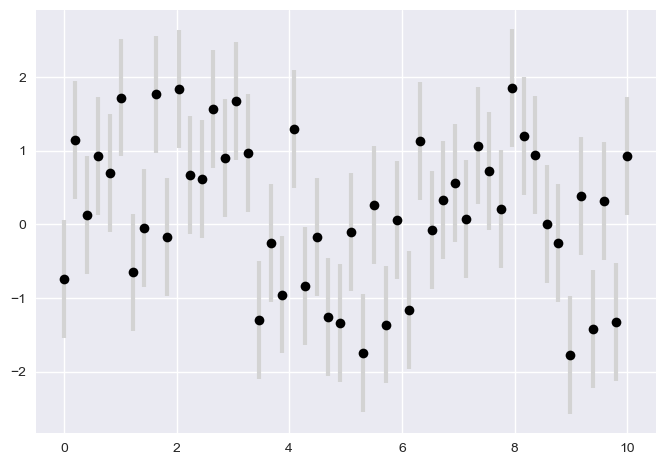

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Además de estas opciones, también puede especificar barras de error horizontales (``xerr``), barras de error unilaterales y muchas otras variantes.
Para obtener más información sobre las opciones disponibles, consulte la cadena de documentación de ``plt.errorbar``.

## Continuous Errors

En algunas situaciones es conveniente mostrar barras de error en cantidades continuas.
Aunque Matplotlib no tiene una rutina de conveniencia incorporada para este tipo de aplicación, es relativamente fácil combinar primitivas como ``plt.plot`` y ``plt.fill_between`` para obtener un resultado útil.

Aquí realizaremos una *regresión de proceso gaussiano* simple, utilizando la API de Scikit-Learn.

Este es un método para ajustar una función no paramétrica muy flexible a los datos con una medida continua de la incertidumbre.
No profundizaremos en los detalles de la regresión de proceso gaussiano en este punto, sino que nos centraremos en cómo se puede visualizar una medición de error continua de este tipo:

```bash
!conda install -c conda-forge scikit-learn -y
```
or 
```bash
!pip install scikit-learn
```

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# definir el modelo y dibujar algunos datos
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Calcular el ajuste del proceso gaussiano
kernel = DotProduct() + WhiteKernel()

gp = GaussianProcessRegressor(kernel=kernel,
        random_state=200)

gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

Ahora tenemos ``xfit``, ``yfit`` y ``dyfit``, que muestrean el ajuste continuo a nuestros datos.
Podríamos pasarlos a la función ``plt.errorbar`` como se indicó anteriormente, pero en realidad no queremos representar gráficamente 1000 puntos con 1000 barras de error.
En cambio, podemos usar la función ``plt.fill_between`` con un color claro para visualizar este error continuo:

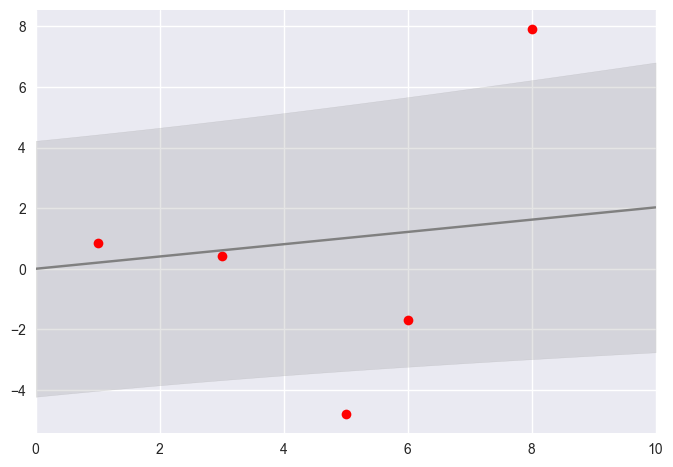

In [4]:
# Visualiza el resultado
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Observe lo que hemos hecho aquí con la función ``fill_between``: pasamos un valor x, luego el límite inferior y, luego el límite superior y, y el resultado es que el área entre estas regiones está llena.

La figura resultante ofrece una visión muy intuitiva de lo que hace el algoritmo de regresión del proceso gaussiano: en las regiones cercanas a un punto de datos medido, el modelo está fuertemente restringido y esto se refleja en los pequeños errores del modelo.
En las regiones alejadas de un punto de datos medido, el modelo no está fuertemente restringido y los errores del modelo aumentan.

Para obtener más información sobre las opciones disponibles en ``plt.fill_between()`` (y la función ``plt.fill()`` estrechamente relacionada), consulte la cadena de documentación de la función o la [documentación de Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between).